In [1]:
import pandas as pd
import numpy as np
import ast  # For safely evaluating string representations of lists

In [2]:
frequency_data = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/mous_words_syllable_bigram_frequencies.csv')

In [3]:
frequency_data

,Word,IPA,Syllables,Min_Freq_Count,Max_Freq_Count,Mean_Freq_Count,Bigrams,Bigram Occurrence Counts,Zipf,FREQcount,Lg10WF
0,toen,tˈun,tun,177.0,177.0,1.770000e+02,"['to', 'oe', 'en']","[2236591.0, 837795.0, 8542439.0]",6.032333,47514.0,4.676822
1,de,dˈə,də,208410.0,208410.0,2.084100e+05,['de'],[2559661.0],7.381291,1061177.0,6.025788
2,barkeeper,bˈɑrkeːpər,bɑr - keː - pər,1201.0,22550.0,1.399933e+04,"['ba', 'ar', 'rk', 'ke', 'ee', 'ep', 'pe', 'er']","[584273.0, 1754491.0, 2174749.0, 3143026.0, 94...",3.622674,184.0,2.264818
3,die,dˈi,di,441857.0,441857.0,4.418570e+05,"['di', 'ie']","[1050254.0, 2076673.0]",6.853871,315041.0,5.498367
4,irritante,ˌɪɾritˈɑntə,ɪɾ - ri - tɑn - tə,8.0,995799.0,2.623075e+05,"['ir', 'rr', 'ri', 'it', 'ta', 'an', 'nt', 'te']","[2884214.0, 200692.0, 1787712.0, 333345.0, 892...",3.284921,84.0,1.924279
...,...,...,...,...,...,...,...,...,...,...,...
1937,blije,blˈɛɪə,blɛɪ - ə,1796.0,2281166.0,1.141481e+06,"['bl', 'li', 'ij', 'je']","[152155.0, 3369152.0, 1639122.0, 913788.0]",3.485836,134.0,2.127105
1938,jongeren,jˈɔŋərən,jɔŋ - ə - rən,6659.0,2281166.0,7.780040e+05,"['jo', 'on', 'ng', 'ge', 'er', 're', 'en']","[866375.0, 2451854.0, 2927082.0, 3692145.0, 67...",3.965097,406.0,2.608526
1939,intens,ˈɪntəns,ɪn - təns,575.0,214096.0,1.073355e+05,"['in', 'nt', 'te', 'en', 'ns']","[2264626.0, 1477178.0, 3522714.0, 8542439.0, 6...",3.778748,264.0,2.421604
1940,plezier,pleːzˈir,pleː - zir,1573.0,6109.0,3.841000e+03,"['pl', 'le', 'ez', 'zi', 'ie', 'er']","[97171.0, 4397946.0, 100963.0, 123482.0, 20766...",5.093966,5475.0,3.738384


In [4]:
#show values of frequency_data where Bigram Occurrence Counts is an empty list
empty_bigram_occurrence_counts = frequency_data[frequency_data['Bigram Occurrence Counts'].apply(lambda x: ast.literal_eval(x) == [])]
empty_bigram_occurrence_counts

,Word,IPA,Syllables,Min_Freq_Count,Max_Freq_Count,Mean_Freq_Count,Bigrams,Bigram Occurrence Counts,Zipf,FREQcount,Lg10WF
1012,u,NaN,NaN,NaN,NaN,NaN,[],[],6.736845,240625.0,5.381341


In [5]:
#drop row 1012 from frequency_data
frequency_data = frequency_data.drop(index=1012)

In [6]:
# Ensure all elements in 'Bigram Occurrence Counts' are parsed as lists of floats
def to_float_list(x):
    if isinstance(x, str):  # Check if the value is a string
        x = ast.literal_eval(x)  # Safely evaluate the string to a Python object
    return [float(i) for i in x]


In [7]:
frequency_data['Log10_Min_Syll_Freq'] = frequency_data['Min_Freq_Count'].apply(lambda x: np.log10(x))
frequency_data['Log10_Max_Syll_Freq'] = frequency_data['Max_Freq_Count'].apply(lambda x: np.log10(x))
frequency_data['Log10_Mean_Syll_Freq'] = frequency_data['Mean_Freq_Count'].apply(lambda x: np.log10(x))
frequency_data['Min_BG_Freq_Count'] = frequency_data['Bigram Occurrence Counts'].apply(lambda x: min(to_float_list(x)))
frequency_data['Max_BG_Freq_Count'] = frequency_data['Bigram Occurrence Counts'].apply(lambda x: max(to_float_list(x)))
frequency_data['Mean_BG_Freq_Count'] = frequency_data['Bigram Occurrence Counts'].apply(lambda x: np.mean(to_float_list(x)))
frequency_data['Log10_Min_BG_Freq'] = frequency_data['Min_BG_Freq_Count'].apply(lambda x: np.log10(x))
frequency_data['Log10_Max_BG_Freq'] = frequency_data['Max_BG_Freq_Count'].apply(lambda x: np.log10(x))
frequency_data['Log10_Mean_BG_Freq'] = frequency_data['Mean_BG_Freq_Count'].apply(lambda x: np.log10(x))

In [8]:
frequency_data['Number of Letters'] = frequency_data['Word'].apply(lambda x: len(x.split('_')[0]) if isinstance(x, str) else 0)
frequency_data['Syllable Count'] = frequency_data['Syllables'].apply(lambda x: len(x.split('-')) if isinstance(x, str) else 0)

In [14]:
frequency_data

,Word,IPA,Syllables,Min_Freq_Count,Max_Freq_Count,Mean_Freq_Count,Bigrams,Bigram Occurrence Counts,Zipf Word Frequency,FREQcount,...,Log10(Maximum Syllable Frequency),Log10(Mean Syllable Frequency),Min_BG_Freq_Count,Max_BG_Freq_Count,Mean_BG_Freq_Count,Log10(Minimum Bigram Frequency),Log10(Maximum Bigram Frequency),Log10(Mean Bigram Frequency),Number of Letters,Number of Syllables
0,toen,tˈun,tun,177.0,177.0,1.770000e+02,"['to', 'oe', 'en']","[2236591.0, 837795.0, 8542439.0]",6.032333,47514.0,...,2.247973,2.247973,837795.0,8542439.0,3.872275e+06,5.923138,6.931582,6.587966,4,1
1,de,dˈə,də,208410.0,208410.0,2.084100e+05,['de'],[2559661.0],7.381291,1061177.0,...,5.318919,5.318919,2559661.0,2559661.0,2.559661e+06,6.408182,6.408182,6.408182,2,1
2,barkeeper,bˈɑrkeːpər,bɑr - keː - pər,1201.0,22550.0,1.399933e+04,"['ba', 'ar', 'rk', 'ke', 'ee', 'ep', 'pe', 'er']","[584273.0, 1754491.0, 2174749.0, 3143026.0, 94...",3.622674,184.0,...,4.353147,4.146107,189025.0,6799370.0,2.081522e+06,5.276519,6.832469,6.318381,9,3
3,die,dˈi,di,441857.0,441857.0,4.418570e+05,"['di', 'ie']","[1050254.0, 2076673.0]",6.853871,315041.0,...,5.645282,5.645282,1050254.0,2076673.0,1.563464e+06,6.021294,6.317368,6.194088,3,1
4,irritante,ˌɪɾritˈɑntə,ɪɾ - ri - tɑn - tə,8.0,995799.0,2.623075e+05,"['ir', 'rr', 'ri', 'it', 'ta', 'an', 'nt', 'te']","[2884214.0, 200692.0, 1787712.0, 333345.0, 892...",3.284921,84.0,...,5.998172,5.418811,200692.0,4143386.0,1.905164e+06,5.302530,6.617355,6.279932,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,blije,blˈɛɪə,blɛɪ - ə,1796.0,2281166.0,1.141481e+06,"['bl', 'li', 'ij', 'je']","[152155.0, 3369152.0, 1639122.0, 913788.0]",3.485836,134.0,...,6.358157,6.057469,152155.0,3369152.0,1.518554e+06,5.182286,6.527521,6.181430,5,2
1938,jongeren,jˈɔŋərən,jɔŋ - ə - rən,6659.0,2281166.0,7.780040e+05,"['jo', 'on', 'ng', 'ge', 'er', 're', 'en']","[866375.0, 2451854.0, 2927082.0, 3692145.0, 67...",3.965097,406.0,...,6.358157,5.890982,866375.0,8542439.0,3.841034e+06,5.937706,6.931582,6.584448,8,3
1939,intens,ˈɪntəns,ɪn - təns,575.0,214096.0,1.073355e+05,"['in', 'nt', 'te', 'en', 'ns']","[2264626.0, 1477178.0, 3522714.0, 8542439.0, 6...",3.778748,264.0,...,5.330609,5.030743,612425.0,8542439.0,3.283876e+06,5.787053,6.931582,6.516387,6,2
1940,plezier,pleːzˈir,pleː - zir,1573.0,6109.0,3.841000e+03,"['pl', 'le', 'ez', 'zi', 'ie', 'er']","[97171.0, 4397946.0, 100963.0, 123482.0, 20766...",5.093966,5475.0,...,3.785970,3.584444,97171.0,6799370.0,2.265934e+06,4.987537,6.832469,6.355247,7,2


In [10]:
#Parameters for making the correlation matrix
#frequency_data['Zipf'] : rename to Zipf Word Frequency
#frequency_data['Log10_Min_Syll_Freq'] : rename to Log10(Minimum Syllable Frequency)
#frequency_data['Log10_Min_BG_Freq'] : rename to Log10(Minimum Bigram Frequency)
#frequency_data['Number of Letters']
#frequency_data['Syllable Count'] : rename to Number of Syllables
#frequency_data['Log10_Max_Syll_Freq'] : rename to Log10(Maximum Syllable Frequency)
#frequency_data['Log10_Mean_Syll_Freq'] : rename to Log10(Mean Syllable Frequency)
#frequency_data['Log10_Max_BG_Freq'] : rename to Log10(Maximum Bigram Frequency)
#frequency_data['Log10_Mean_BG_Freq'] : rename to Log10(Mean Bigram Frequency)




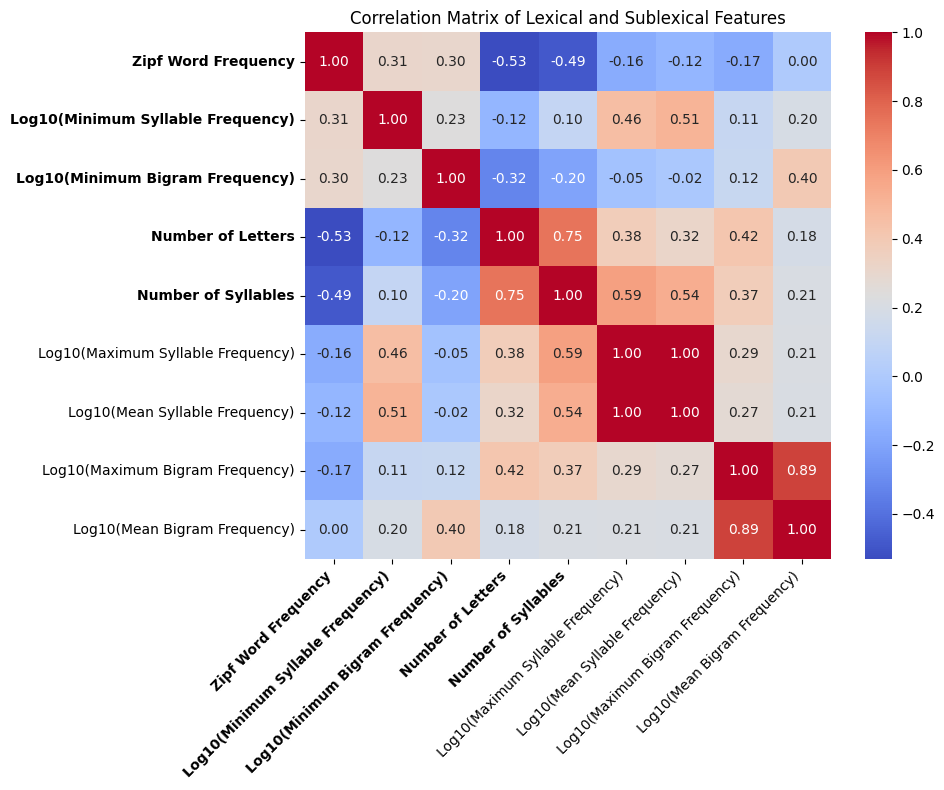

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns
frequency_data = frequency_data.rename(columns={
    'Zipf': 'Zipf Word Frequency',
    'Log10_Min_Syll_Freq': 'Log10(Minimum Syllable Frequency)',
    'Log10_Min_BG_Freq': 'Log10(Minimum Bigram Frequency)',
    'Syllable Count': 'Number of Syllables',
    'Log10_Max_Syll_Freq': 'Log10(Maximum Syllable Frequency)',
    'Log10_Mean_Syll_Freq': 'Log10(Mean Syllable Frequency)',
    'Log10_Max_BG_Freq': 'Log10(Maximum Bigram Frequency)',
    'Log10_Mean_BG_Freq': 'Log10(Mean Bigram Frequency)'
})

# Define the correct column order
ordered_cols = [
    'Zipf Word Frequency',
    'Log10(Minimum Syllable Frequency)',
    'Log10(Minimum Bigram Frequency)',
    'Number of Letters',
    'Number of Syllables',
    'Log10(Maximum Syllable Frequency)',
    'Log10(Mean Syllable Frequency)',
    'Log10(Maximum Bigram Frequency)',
    'Log10(Mean Bigram Frequency)'
]

# Subset and compute correlation
subset_data = frequency_data[ordered_cols]
corr_matrix = subset_data.corr()

# Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Bold only the first 5 tick labels
bold_labels = ordered_cols[:5]
regular_labels = ordered_cols[5:]

# Set y-tick labels
yticks = ax.get_yticklabels()
for tick in yticks:
    text = tick.get_text()
    tick.set_fontweight('bold' if text in bold_labels else 'normal')

# Set x-tick labels
xticks = ax.get_xticklabels()
for tick in xticks:
    text = tick.get_text()
    tick.set_fontweight('bold' if text in bold_labels else 'normal')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of Lexical and Sublexical Features')
plt.tight_layout()
plt.show()

In [22]:
# Check for any NaNs or infinite values in the selected columns
bad_rows = frequency_data[ordered_cols].replace([np.inf, -np.inf], np.nan).isnull().any(axis=1)
print(frequency_data[ordered_cols][bad_rows])

      Zipf Word Frequency  Log10(Minimum Syllable Frequency)  \
90                    NaN                                NaN   
247                   NaN                                NaN   
370                   NaN                                NaN   
388                   NaN                                NaN   
406                   NaN                                NaN   
423                   NaN                                NaN   
432                   NaN                                NaN   
711                   NaN                                NaN   
800                   NaN                                NaN   
821                   NaN                                NaN   
914              4.296517                                NaN   
927                   NaN                                NaN   
1048                  NaN                                NaN   
1161                  NaN                                NaN   
1213                  NaN               

In [23]:
#drop bad_rows from frequency_data
frequency_data = frequency_data[~bad_rows]

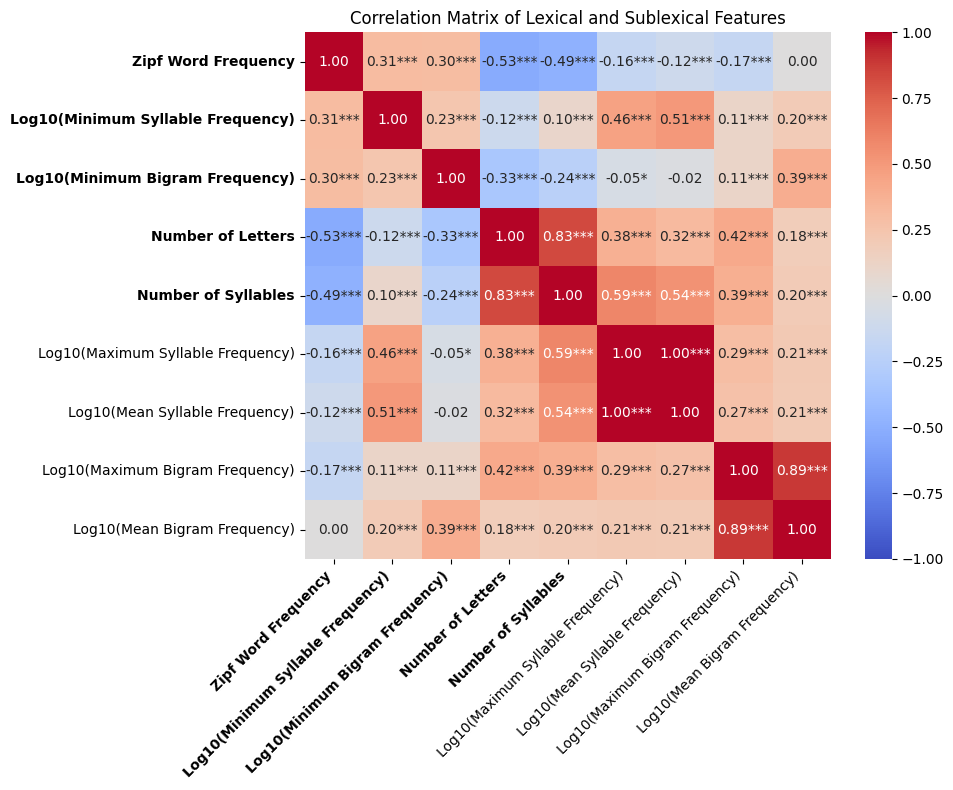

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Rename columns
frequency_data = frequency_data.rename(columns={
    'Zipf': 'Zipf Word Frequency',
    'Log10_Min_Syll_Freq': 'Log10(Minimum Syllable Frequency)',
    'Log10_Min_BG_Freq': 'Log10(Minimum Bigram Frequency)',
    'Syllable Count': 'Number of Syllables',
    'Log10_Max_Syll_Freq': 'Log10(Maximum Syllable Frequency)',
    'Log10_Mean_Syll_Freq': 'Log10(Mean Syllable Frequency)',
    'Log10_Max_BG_Freq': 'Log10(Maximum Bigram Frequency)',
    'Log10_Mean_BG_Freq': 'Log10(Mean Bigram Frequency)'
})

# Define correct column order
ordered_cols = [
    'Zipf Word Frequency',
    'Log10(Minimum Syllable Frequency)',
    'Log10(Minimum Bigram Frequency)',
    'Number of Letters',
    'Number of Syllables',
    'Log10(Maximum Syllable Frequency)',
    'Log10(Mean Syllable Frequency)',
    'Log10(Maximum Bigram Frequency)',
    'Log10(Mean Bigram Frequency)'
]

# Subset and clean data
subset_data = frequency_data[ordered_cols].replace([np.inf, -np.inf], np.nan).dropna()

# Compute correlation coefficients and p-values
rvals = np.zeros((len(ordered_cols), len(ordered_cols)))
pvals = np.zeros_like(rvals)

for i, col1 in enumerate(ordered_cols):
    for j, col2 in enumerate(ordered_cols):
        r, p = pearsonr(subset_data[col1], subset_data[col2])
        rvals[i, j] = r
        pvals[i, j] = p

# Significance asterisks, skipping diagonal
def significance_label(p, is_diag):
    if is_diag:
        return ''
    if p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    else: return ''

# Create annotation labels
annotations = np.empty_like(rvals, dtype=object)
for i in range(len(ordered_cols)):
    for j in range(len(ordered_cols)):
        is_diag = (i == j)
        annotations[i, j] = f"{rvals[i, j]:.2f}{significance_label(pvals[i, j], is_diag)}"

# Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    rvals, annot=annotations, cmap='coolwarm', fmt='', square=True,
    xticklabels=ordered_cols, yticklabels=ordered_cols, center=0, vmin=-1, vmax=1
)

# Bold only the first 5 labels
bold_labels = ordered_cols[:5]

# Bold y-axis ticks
yticks = ax.get_yticklabels()
for tick in yticks:
    tick.set_fontweight('bold' if tick.get_text() in bold_labels else 'normal')

# Bold and rotate x-axis ticks
xticks = ax.get_xticklabels()
for tick in xticks:
    tick.set_fontweight('bold' if tick.get_text() in bold_labels else 'normal')
plt.xticks(rotation=45, ha='right')

plt.title('Correlation Matrix of Lexical and Sublexical Features')
plt.tight_layout()
plt.show()

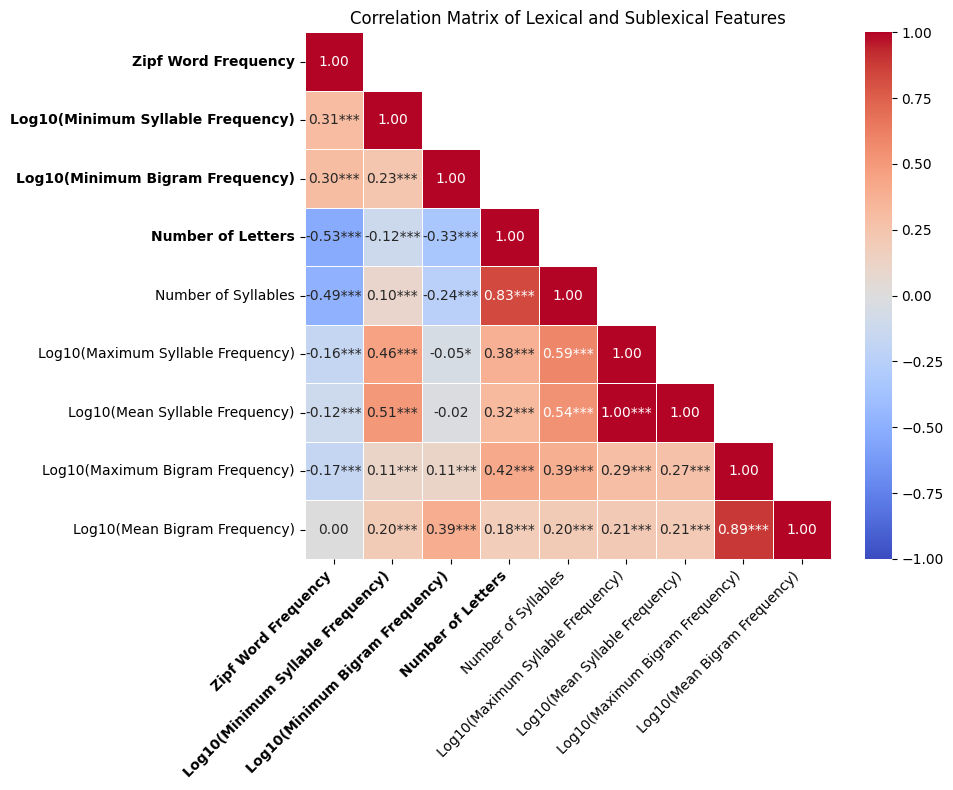

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Rename columns
frequency_data = frequency_data.rename(columns={
    'Zipf': 'Zipf Word Frequency',
    'Log10_Min_Syll_Freq': 'Log10(Minimum Syllable Frequency)',
    'Log10_Min_BG_Freq': 'Log10(Minimum Bigram Frequency)',
    'Syllable Count': 'Number of Syllables',
    'Log10_Max_Syll_Freq': 'Log10(Maximum Syllable Frequency)',
    'Log10_Mean_Syll_Freq': 'Log10(Mean Syllable Frequency)',
    'Log10_Max_BG_Freq': 'Log10(Maximum Bigram Frequency)',
    'Log10_Mean_BG_Freq': 'Log10(Mean Bigram Frequency)'
})

# Define column order
ordered_cols = [
    'Zipf Word Frequency',
    'Log10(Minimum Syllable Frequency)',
    'Log10(Minimum Bigram Frequency)',
    'Number of Letters',
    'Number of Syllables',
    'Log10(Maximum Syllable Frequency)',
    'Log10(Mean Syllable Frequency)',
    'Log10(Maximum Bigram Frequency)',
    'Log10(Mean Bigram Frequency)'
]

# Subset and clean data
subset_data = frequency_data[ordered_cols].replace([np.inf, -np.inf], np.nan).dropna()

# Compute correlation coefficients and p-values
n = len(ordered_cols)
rvals = np.zeros((n, n))
pvals = np.zeros((n, n))

for i, col1 in enumerate(ordered_cols):
    for j, col2 in enumerate(ordered_cols):
        r, p = pearsonr(subset_data[col1], subset_data[col2])
        rvals[i, j] = r
        pvals[i, j] = p

# Create annotation labels with asterisks (but exclude asterisks on diagonal)
def significance_label(p, is_diag):
    if is_diag: return ''
    elif p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    else: return ''

annotations = np.empty((n, n), dtype=object)
for i in range(n):
    for j in range(n):
        is_diag = (i == j)
        annotations[i, j] = f"{rvals[i, j]:.2f}{significance_label(pvals[i, j], is_diag)}"

# Mask the upper triangle (excluding diagonal)
mask = np.triu(np.ones_like(rvals, dtype=bool), k=1)

# Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    rvals, mask=mask, annot=annotations, cmap='coolwarm', fmt='', square=True,
    xticklabels=ordered_cols, yticklabels=ordered_cols, center=0, vmin=-1, vmax=1,
    linewidths=0.5, linecolor='white'
)

# Bold only the first 5 tick labels
bold_labels = ordered_cols[:4]

# Bold y-axis ticks
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold' if tick.get_text() in bold_labels else 'normal')

# Bold and rotate x-axis ticks
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold' if tick.get_text() in bold_labels else 'normal')
plt.xticks(rotation=45, ha='right')

plt.title('Correlation Matrix of Lexical and Sublexical Features')
plt.tight_layout()
plt.show()

"The matrix displays pairwise Pearson correlation coefficients among nine word-level parameters, including lexical frequency, sublexical frequency measures (bigram and syllable), and structural characteristics (letter and syllable counts). The color scale is centered at zero, such that red and blue indicate positive and negative correlations, respectively. Asterisks denote statistical significance of each correlation coefficient (p < .001: ***). Bolded axis labels indicate the five features that were ultimately selected as parametric modulators in the fMRI general linear models. Not shown above is spoken word duration in seconds, which was included as a parametric modulator in the auditory word frequency correlation contrast, but is not a constant lexical characteristic. While log-transformed maximum and mean frequencies for syllables and bigrams were initially considered (see Supplementary Methods), they were excluded due to lack of explanatory power."